In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [168]:
df = pd.read_csv('../data/Divar.csv')

In [169]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df[['construction_year']].values

array([[nan],
       ['۱۳۸۴'],
       ['۱۴۰۱'],
       ...,
       ['قبل از ۱۳۷۰'],
       [nan],
       ['۱۳۸۲']], dtype=object)

In [171]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Combine into a Series with percentage
missing_info = (missing_values / len(df) * 100).sort_values(ascending=False)

# Print only columns with missing values
for col in missing_info.index:
    if missing_values[col] > 0:
        print(f"{col}: {missing_values[col]} missing ({missing_info[col]:.2f}%)")


rent_to_single: 999981 missing (100.00%)
cost_per_extra_person: 989759 missing (98.98%)
rent_price_on_special_days: 989537 missing (98.95%)
rent_price_at_weekends: 986449 missing (98.64%)
rent_price_on_regular_days: 981932 missing (98.19%)
extra_person_capacity: 975991 missing (97.60%)
property_type: 972943 missing (97.29%)
has_sauna: 971521 missing (97.15%)
has_jacuzzi: 971272 missing (97.13%)
has_pool: 970610 missing (97.06%)
regular_person_capacity: 970130 missing (97.01%)
has_barbecue: 968802 missing (96.88%)
has_security_guard: 968688 missing (96.87%)
has_gas: 966570 missing (96.66%)
has_water: 966556 missing (96.66%)
has_electricity: 966555 missing (96.66%)
has_business_deed: 965321 missing (96.53%)
transformed_rent: 927591 missing (92.76%)
transformed_credit: 927591 missing (92.76%)
rent_type: 896039 missing (89.60%)
land_size: 813604 missing (81.36%)
deed_type: 746542 missing (74.65%)
user_type: 711118 missing (71.11%)
unit_per_floor: 697717 missing (69.77%)
total_floors_count:

In [172]:
df.describe()

,Unnamed: 0,rent_value,price_value,credit_value,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,regular_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
count,1000000.000000,3.513220e+05,5.683460e+05,3.520950e+05,3.520850e+05,7.240900e+04,3.512480e+05,7.240900e+04,1.863960e+05,9.803940e+05,29870.000000,1.024100e+04,1.806800e+04,1.046300e+04,1.355100e+04,655608.000000,655608.000000,339699.000000
mean,499999.500000,4.102299e+10,1.736537e+10,4.872084e+10,4.872222e+10,8.557025e+09,4.103164e+10,1.619934e+07,4.165480e+03,4.440648e+03,6.557650,1.209785e+10,1.389016e+11,2.355548e+10,3.156551e+10,34.982108,51.629743,465.149147
std,288675.278933,3.807534e+12,5.878739e+11,4.341346e+12,4.341407e+12,2.064576e+12,3.807935e+12,5.217890e+07,1.218927e+05,1.367118e+05,7.698655,1.103482e+12,7.042335e+12,1.542049e+12,2.434942e+12,2.379169,3.160920,125.896250
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.626478,40.162369,0.000000
25%,249999.750000,1.111110e+05,1.400000e+09,1.000000e+08,1.000000e+08,2.000000e+08,1.111110e+05,1.000000e+06,1.100000e+02,7.500000e+01,3.000000,5.000000e+04,4.000000e+05,6.000000e+05,5.500000e+05,34.553551,50.677175,500.000000
50%,499999.500000,5.000000e+06,2.840000e+09,2.500000e+08,2.500000e+08,4.000000e+08,5.000000e+06,6.000000e+06,1.950000e+02,1.030000e+02,4.000000,1.000000e+05,8.000000e+05,1.200000e+06,1.100000e+06,35.723312,51.345791,500.000000
75%,749999.250000,1.200000e+07,5.900000e+09,5.000000e+08,5.000000e+08,8.500000e+08,1.200000e+07,1.500000e+07,2.800000e+02,1.650000e+02,7.000000,2.000000e+05,1.600000e+06,2.500000e+06,2.500000e+06,36.307013,51.805291,500.000000
max,999999.000000,1.000000e+15,1.000000e+14,1.000000e+15,1.000000e+15,5.555556e+14,1.000000e+15,3.000000e+09,1.000000e+07,1.000000e+07,50.000000,1.111111e+14,5.006007e+14,1.111111e+14,2.002503e+14,40.358055,74.511620,500.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [174]:
df['cat2_slug'].unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

In [175]:
df['cat3_slug'].unique()

array(['villa', 'apartment-sell', 'apartment-rent', 'office-rent',
       'shop-sell', 'plot-old', 'house-villa-sell', 'house-villa-rent',
       'shop-rent', 'industry-agriculture-business-rent', 'office-sell',
       'industry-agriculture-business-sell', 'presell', 'suite-apartment',
       'partnership', 'workspace', nan], dtype=object)

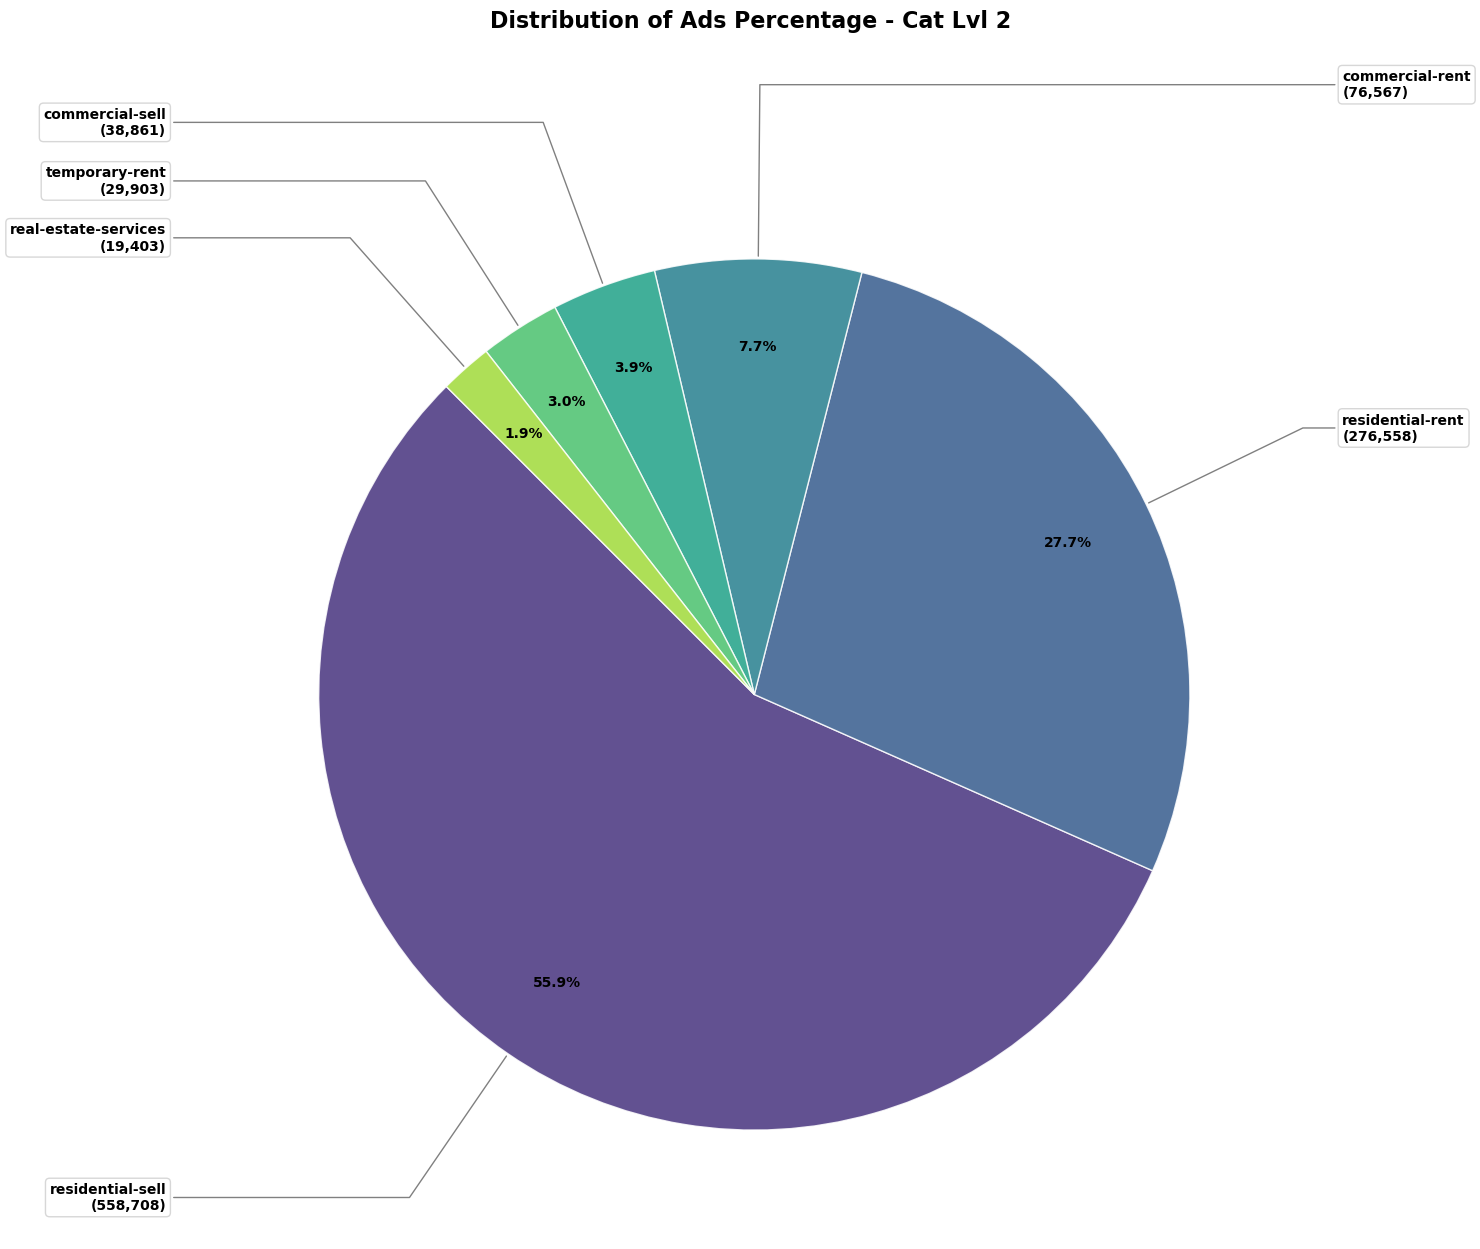

In [176]:
## Part 1

plt.figure(figsize=(18, 12))  
cat2_counts = df['cat2_slug'].value_counts()

# Filter out very small slices to avoid clutter
threshold = 0.01  
filtered_counts = cat2_counts[cat2_counts/cat2_counts.sum() > threshold]
other_count = cat2_counts[cat2_counts/cat2_counts.sum() <= threshold].sum()

if other_count > 0:
    filtered_counts = pd.concat([filtered_counts, pd.Series({'Other': other_count})])

# Create pie chart - rotated 45 degrees clockwise (startangle=135)
wedges, texts, autotexts = plt.pie(
    filtered_counts.values,
    labels=None,  
    autopct=lambda pct: f'{pct:.1f}%',
    startangle=135,  # Rotated 45 degrees clockwise
    colors=sns.color_palette("viridis", len(filtered_counts)),
    pctdistance=0.8,
    textprops={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'},  
    wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'alpha': 0.85}
)

# Make percentage text bold and visible
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')
    autotext.set_fontweight('bold')  # Added bold
    # Remove background for cleaner look
    autotext.set_bbox(None)

# Add labels with leader lines
bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="lightgray", alpha=0.9)
kw = dict(arrowprops=dict(arrowstyle="-", color="gray", lw=1),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    # Add category name and count
    label_text = f"{filtered_counts.index[i]}\n({filtered_counts.iloc[i]:,})"
    plt.annotate(
        label_text,
        xy=(x, y), 
        xytext=(1.35*np.sign(x), 1.4*y),
        horizontalalignment=horizontalalignment,
        fontsize=10,
        fontweight='bold',  # Added bold to labels
        **kw
    )

# Add title with more margin to prevent overlap with leader lines
plt.title('Distribution of Ads Percentage - Cat Lvl 2 \n\n', 
          fontsize=16, fontweight='bold', pad=50)  

# Add legend for very small slices if needed
if other_count > 0:
    plt.legend([f"Other (<{threshold*100:.0f}%)"], loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout with more top margin
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Added more top margin
plt.show()

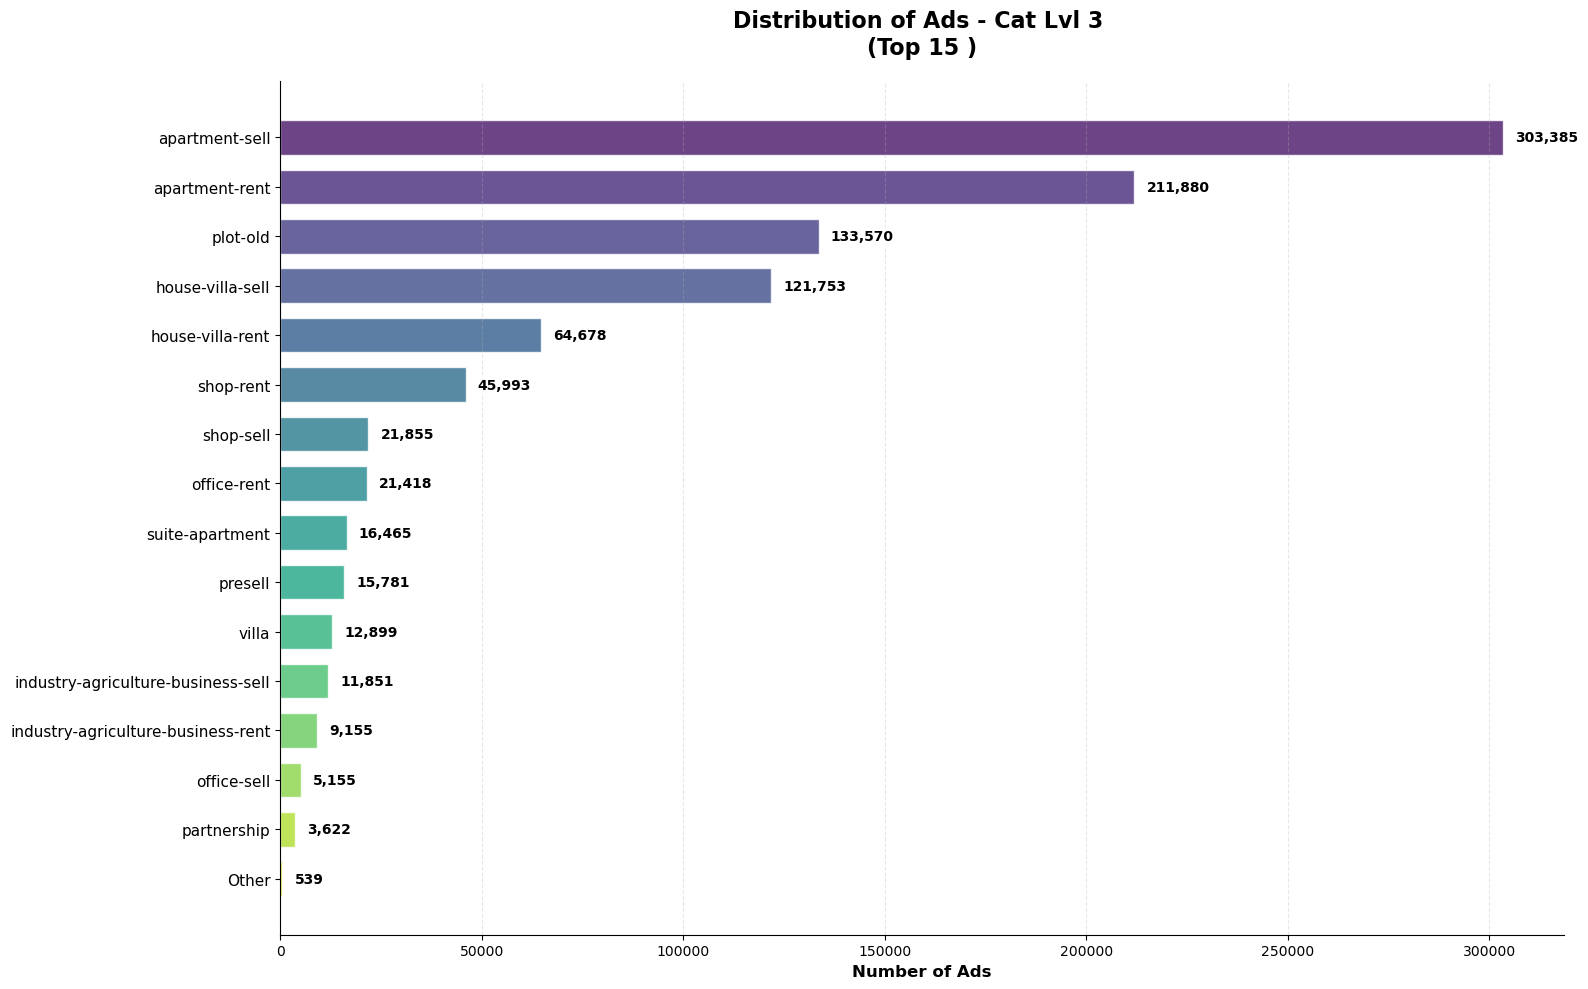

In [177]:
# --- SECOND FIGURE: Level 3 
plt.figure(figsize=(16, 10))
cat3_counts = df['cat3_slug'].value_counts()

# Limit to top N categories for better readability
top_n = 15
if len(cat3_counts) > top_n:
    top_categories = cat3_counts.head(top_n)
    other_count_bar = cat3_counts[top_n:].sum()
    top_categories = pd.concat([top_categories, pd.Series({'Other': other_count_bar})])
else:
    top_categories = cat3_counts

# Create horizontal bar chart
y_pos = np.arange(len(top_categories))
bars = plt.barh(
    y_pos,
    top_categories.values,
    color=sns.color_palette("viridis", len(top_categories)),
    alpha=0.8,
    edgecolor='white',
    linewidth=1,
    height=0.7
)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(top_categories.values) * 0.01, 
             bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', 
             ha='left', 
             va='center', 
             fontsize=10,
             fontweight='bold',  # Keep bold for bar chart numbers
             bbox=dict(facecolor='white', alpha=0.8, pad=2, edgecolor='none'))

plt.yticks(y_pos, [label[:35] + '...' if len(label) > 35 else label 
                   for label in top_categories.index], 
           fontsize=11)
plt.gca().invert_yaxis()  # Display highest values at top
plt.xlabel('Number of Ads', fontsize=12, fontweight='bold')
plt.title('Distribution of Ads - Cat Lvl 3 \n(Top {} )'.format(top_n), 
         fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Remove spines for cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [178]:
# Extract all unique values from the construction_year column
unique_values = df['construction_year'].unique()

# Convert to list and display
unique_values_list = unique_values.tolist()
print("Unique values in construction_year column:")
for i, value in enumerate(unique_values_list, 1):
    print(f"{i}. {value}")



Unique values in construction_year column:
1. nan
2. ۱۳۸۴
3. ۱۴۰۱
4. ۱۴۰۰
5. ۱۴۰۳
6. ۱۳۸۹
7. ۱۳۹۵
8. ۱۳۹۳
9. ۱۳۹۶
10. ۱۳۸۷
11. ۱۳۸۵
12. ۱۳۹۰
13. ۱۳۹۸
14. ۱۴۰۲
15. ۱۳۸۸
16. قبل از ۱۳۷۰
17. ۱۳۹۲
18. ۱۳۸۳
19. ۱۳۹۴
20. ۱۳۹۱
21. ۱۳۸۰
22. ۱۳۷۸
23. ۱۳۷۵
24. ۱۳۹۷
25. ۱۳۹۹
26. ۱۳۸۲
27. ۱۳۸۶
28. ۱۳۷۹
29. ۱۳۷۲
30. ۱۳۷۴
31. ۱۳۷۶
32. ۱۳۷۷
33. ۱۳۷۱
34. ۱۳۸۱
35. ۱۳۷۳


In [179]:
# Create a copy to avoid modifying the original data
construction_data = df['construction_year'].copy()

# Convert Persian digits to English digits with error handling
persian_to_english_map = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')
construction_data = construction_data.astype(str).apply(
    lambda x: x.translate(persian_to_english_map) if isinstance(x, str) else x
)


construction_data = construction_data.str.extract(r'(\d+)', expand=False)

# Convert to numeric, coercing errors to NaN
construction_data = pd.to_numeric(construction_data, errors='coerce')


# Assign back to DataFrame with descriptive name
df['construction_year_clean'] = construction_data

In [180]:
df['construction_year_clean'].sort_values().unique()

array([1370., 1371., 1372., 1373., 1374., 1375., 1376., 1377., 1378.,
       1379., 1380., 1381., 1382., 1383., 1384., 1385., 1386., 1387.,
       1388., 1389., 1390., 1391., 1392., 1393., 1394., 1395., 1396.,
       1397., 1398., 1399., 1400., 1401., 1402., 1403.,   nan])

In [181]:
a = df['construction_year_clean'].isna().mean() * 100
print(a)

18.4172


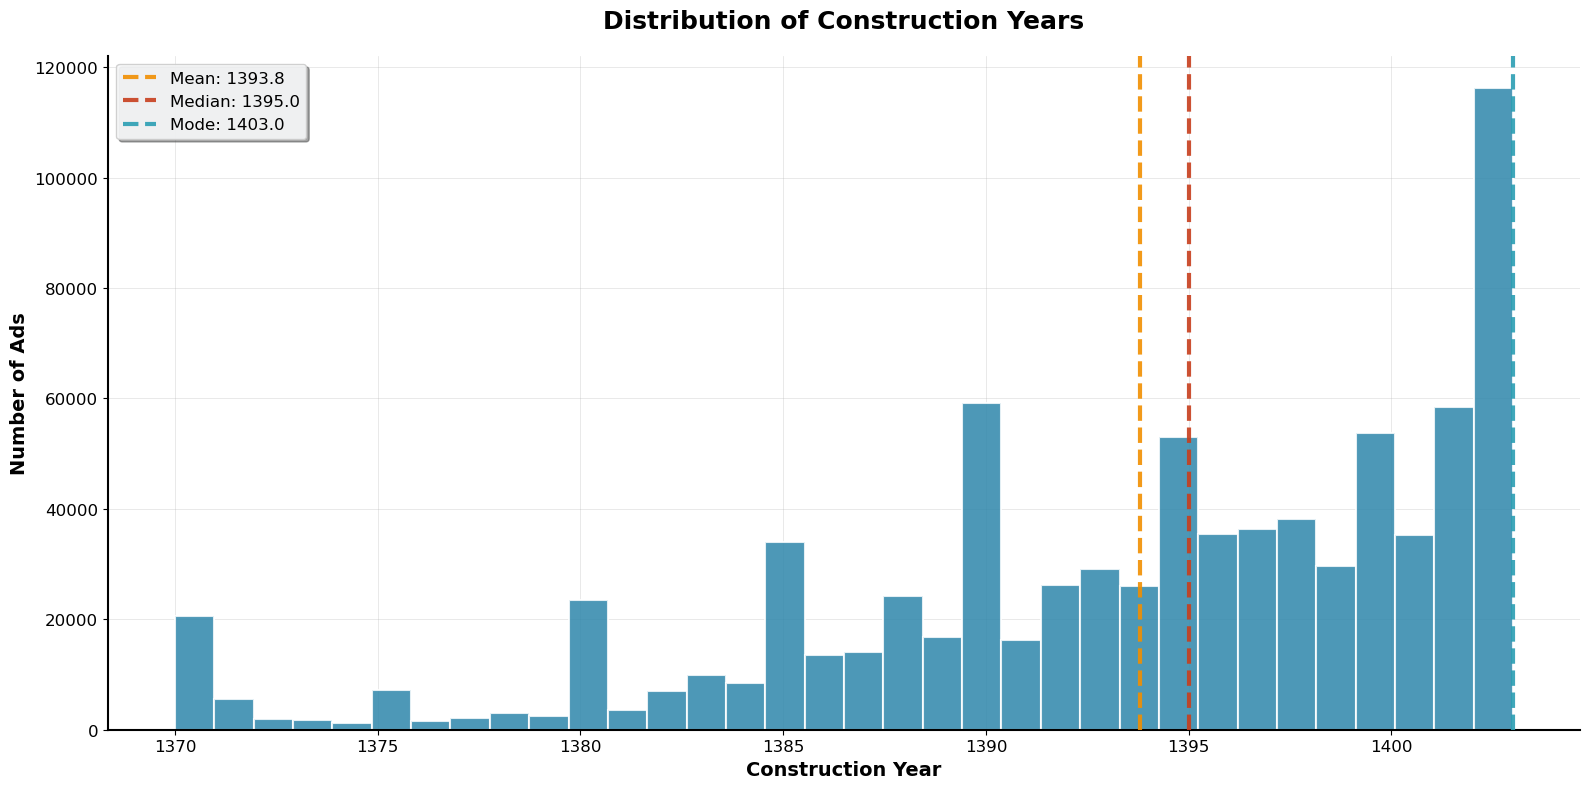

In [182]:
## part 2

plt.figure(figsize=(16, 8))

# Prepare data
clean_data = df['construction_year_clean'].dropna()
mean_year = clean_data.mean()
median_year = clean_data.median()
mode_year = clean_data.mode().iloc[0]

# Create histogram without KDE
ax = plt.hist(clean_data, bins=34, color='#2E86AB', alpha=0.85, 
              edgecolor='white', linewidth=1.5, zorder=2)

# Customize the plot
plt.title('Distribution of Construction Years', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Construction Year', fontsize=14, fontweight='semibold')
plt.ylabel('Number of Ads', fontsize=14, fontweight='semibold')

# Add vertical lines for statistics
plt.axvline(mean_year, color='#F18F01', linestyle='--', linewidth=3, 
           label=f'Mean: {mean_year:.1f}', alpha=0.9, zorder=3)
plt.axvline(median_year, color='#C73E1D', linestyle='--', linewidth=3, 
           label=f'Median: {median_year:.1f}', alpha=0.9, zorder=3)
plt.axvline(mode_year, color='#2B9EB3', linestyle='--', linewidth=3, 
           label=f'Mode: {mode_year:.1f}', alpha=0.9, zorder=3)

# Add legend with better styling
legend = plt.legend(fontsize=12, frameon=True, fancybox=True, 
                   shadow=True, loc='upper left')
legend.get_frame().set_facecolor('#F8F9FA')
legend.get_frame().set_alpha(0.9)

# Customize grid and spines
plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.5, zorder=1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Improve tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [183]:

from persiantools.jdatetime import JalaliDate

# Ensure 'created_at_month' is datetime type
df['created_at_month'] = pd.to_datetime(df['created_at_month'], errors='coerce')

# Step 1: Extract month number from datetime
df['month_num'] = df['created_at_month'].dt.month

# Map month number to Shamsi month names (English)
shamsi_month_map = {
    1:'Farvardin', 2:'Ordibehesht', 3:'Khordad', 4:'Tir', 5:'Mordad', 6:'Shahrivar',
    7:'Mehr', 8:'Aban', 9:'Azar', 10:'Dey', 11:'Bahman', 12:'Esfand'
}

shamsi_months = []
for month in df['month_num']:
    if pd.isna(month):
        shamsi_months.append(None)
        continue
    g_date = pd.Timestamp(f'2023-{int(month):02d}-15')  # representative day
    j_date = JalaliDate(g_date)
    shamsi_months.append(shamsi_month_map[j_date.month])

df['shamsi_month'] = shamsi_months

# Step 2: Determine ad type based on cat2_slug
df['ad_type'] = df['cat2_slug'].apply(lambda x: 'rent' if 'rent' in str(x) else ('sale' if 'sell' in str(x) else 'other'))

# Step 3: Aggregate counts per month and ad type
monthly_counts_list = []
for month in df['shamsi_month'].dropna().unique():
    for ad_type in ['rent','sale']:
        count = df[(df['shamsi_month']==month) & (df['ad_type']==ad_type)].shape[0]
        monthly_counts_list.append([month, ad_type, count])

monthly_counts = pd.DataFrame(monthly_counts_list, columns=['shamsi_month','ad_type','count'])

# Step 4: Ensure Shamsi months are in correct order
month_order = [
    'Farvardin','Ordibehesht','Khordad','Tir','Mordad','Shahrivar',
    'Mehr','Aban','Azar','Dey','Bahman','Esfand'
]
monthly_counts['shamsi_month'] = pd.Categorical(monthly_counts['shamsi_month'],
                                                categories=month_order,
                                                ordered=True)
monthly_counts = monthly_counts.sort_values('shamsi_month')


#

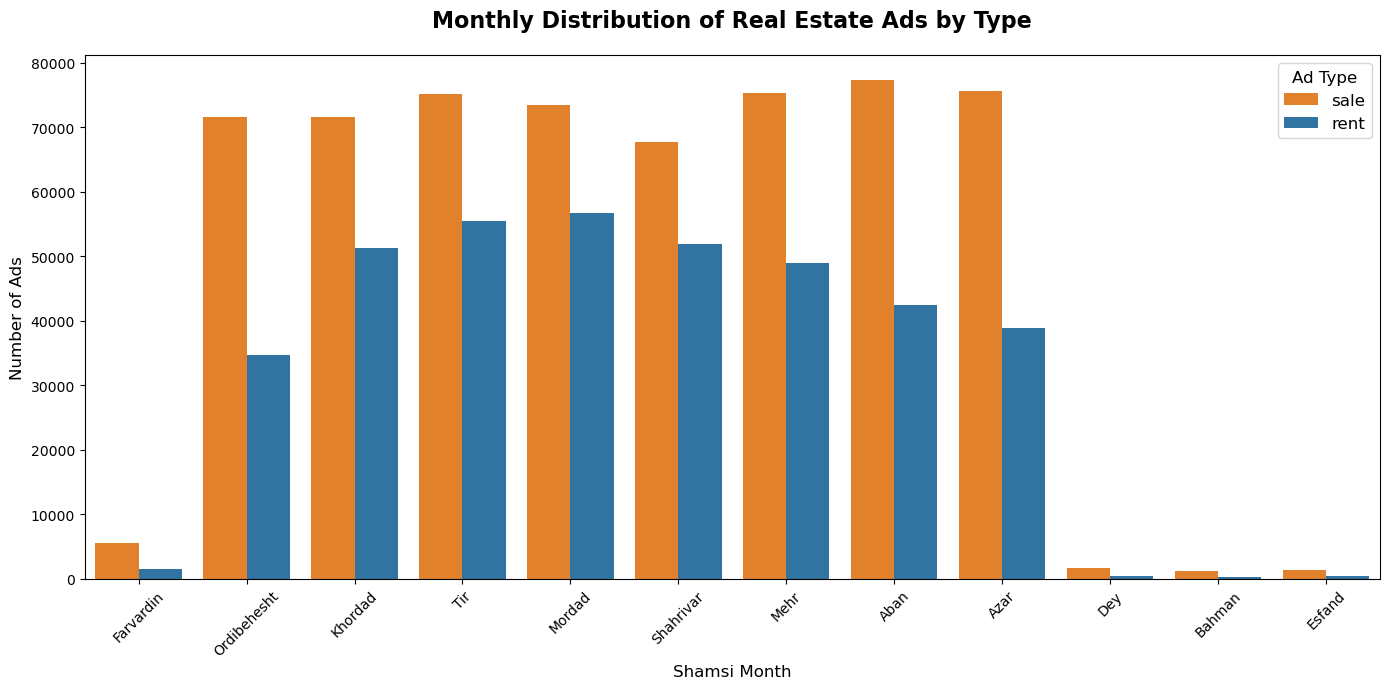

In [184]:
## part 3

plt.figure(figsize=(14,7))
sns.barplot(
    x='shamsi_month',
    y='count',
    hue='ad_type',
    data=monthly_counts,
    palette={'rent':'#1f77b4','sale':'#ff7f0e'}
)
plt.title('Monthly Distribution of Real Estate Ads by Type', fontsize=16, weight='bold', pad=20)
plt.xlabel('Shamsi Month', fontsize=12)
plt.ylabel('Number of Ads', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Ad Type', fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

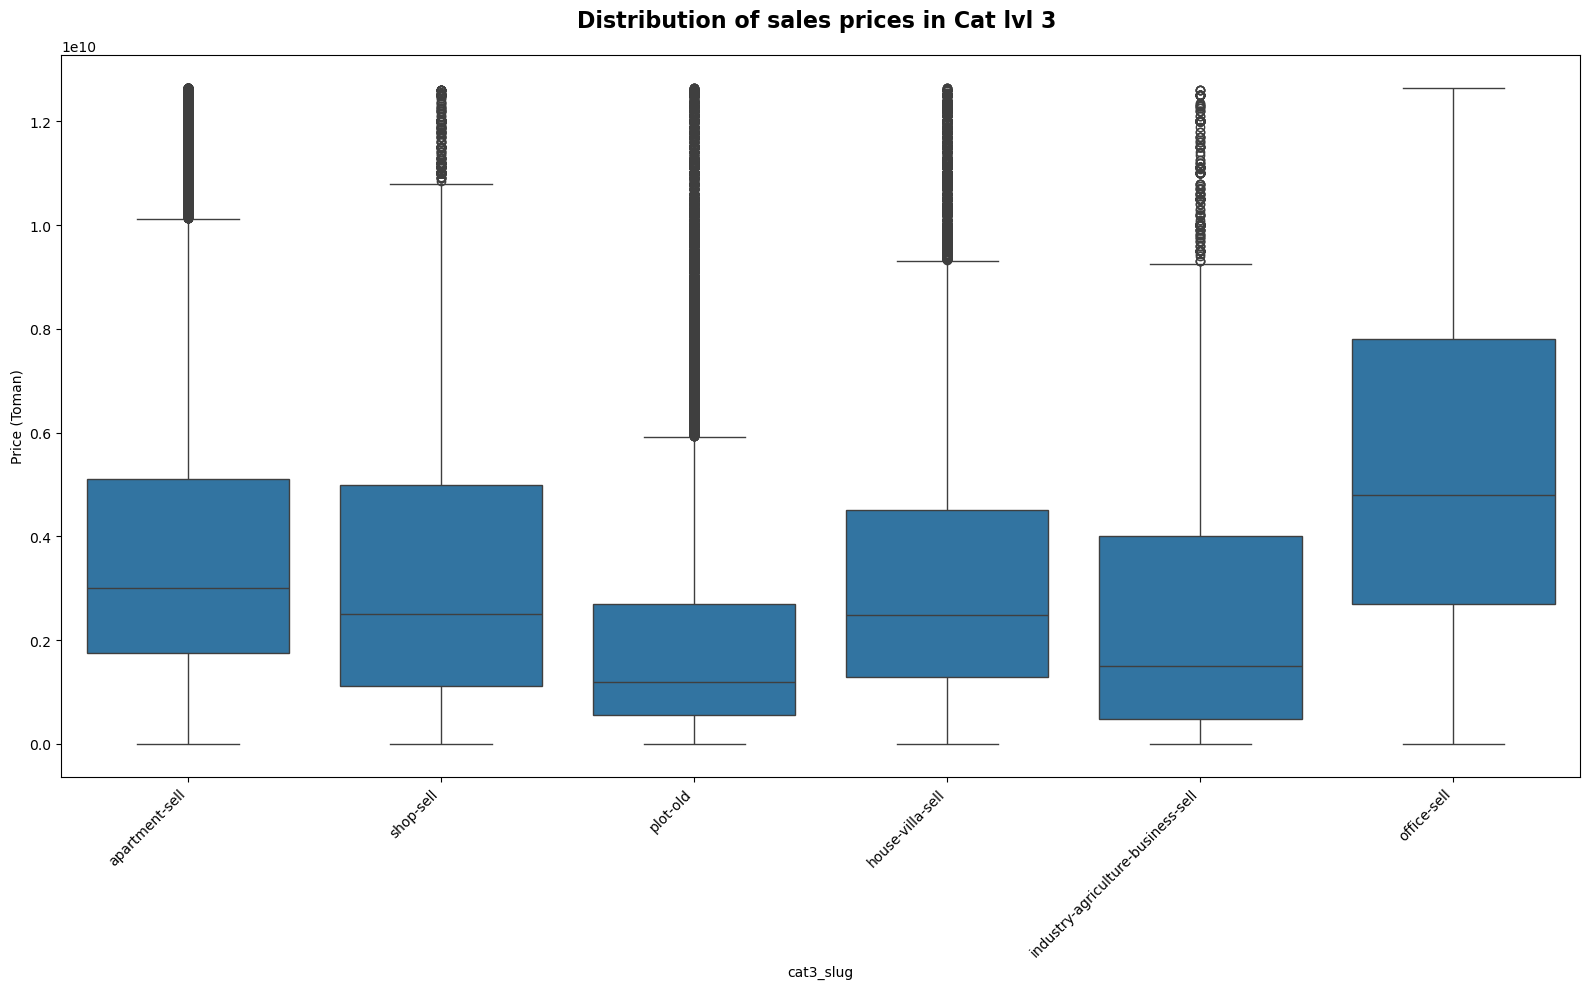

In [185]:
# part 4

plt.figure(figsize=(16, 10))

sell_data = df[df['cat2_slug'].str.contains('sell')]

if len(sell_data) > 0:
 
    Q1 = sell_data['price_value'].quantile(0.25)
    Q3 = sell_data['price_value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = sell_data[
        (sell_data['price_value'] >= lower_bound) & 
        (sell_data['price_value'] <= upper_bound)
    ]
    
    sns.boxplot(data=filtered_data, x='cat3_slug', y='price_value')
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of sales prices in Cat lvl 3 ', fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Price (Toman)')
    plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()

In [186]:
import folium
from folium.plugins import HeatMap



m = folium.Map(
    location=[32.4279, 53.6880],
    zoom_start=6,
    tiles="CartoDB positron"  
)


heat_data = df[['location_latitude', 'location_longitude']].dropna().values.tolist()

HeatMap(
    heat_data,
    radius=7.5,       # smoother & larger clusters
    blur=9,         # softer transitions
    max_zoom=30,     # higher zoom resolution
    gradient={ 
        0.05: 'navy',    
        0.15: 'blue',
        0.25: 'deepskyblue',
        0.35: 'cyan',
        0.45: 'lime',
        0.55: 'yellowgreen',
        0.65: 'yellow',
        0.75: 'orange',
        0.85: 'orangered',
        0.95: 'red' }       
).add_to(m)


m.save("real_estate_heatmap.html")

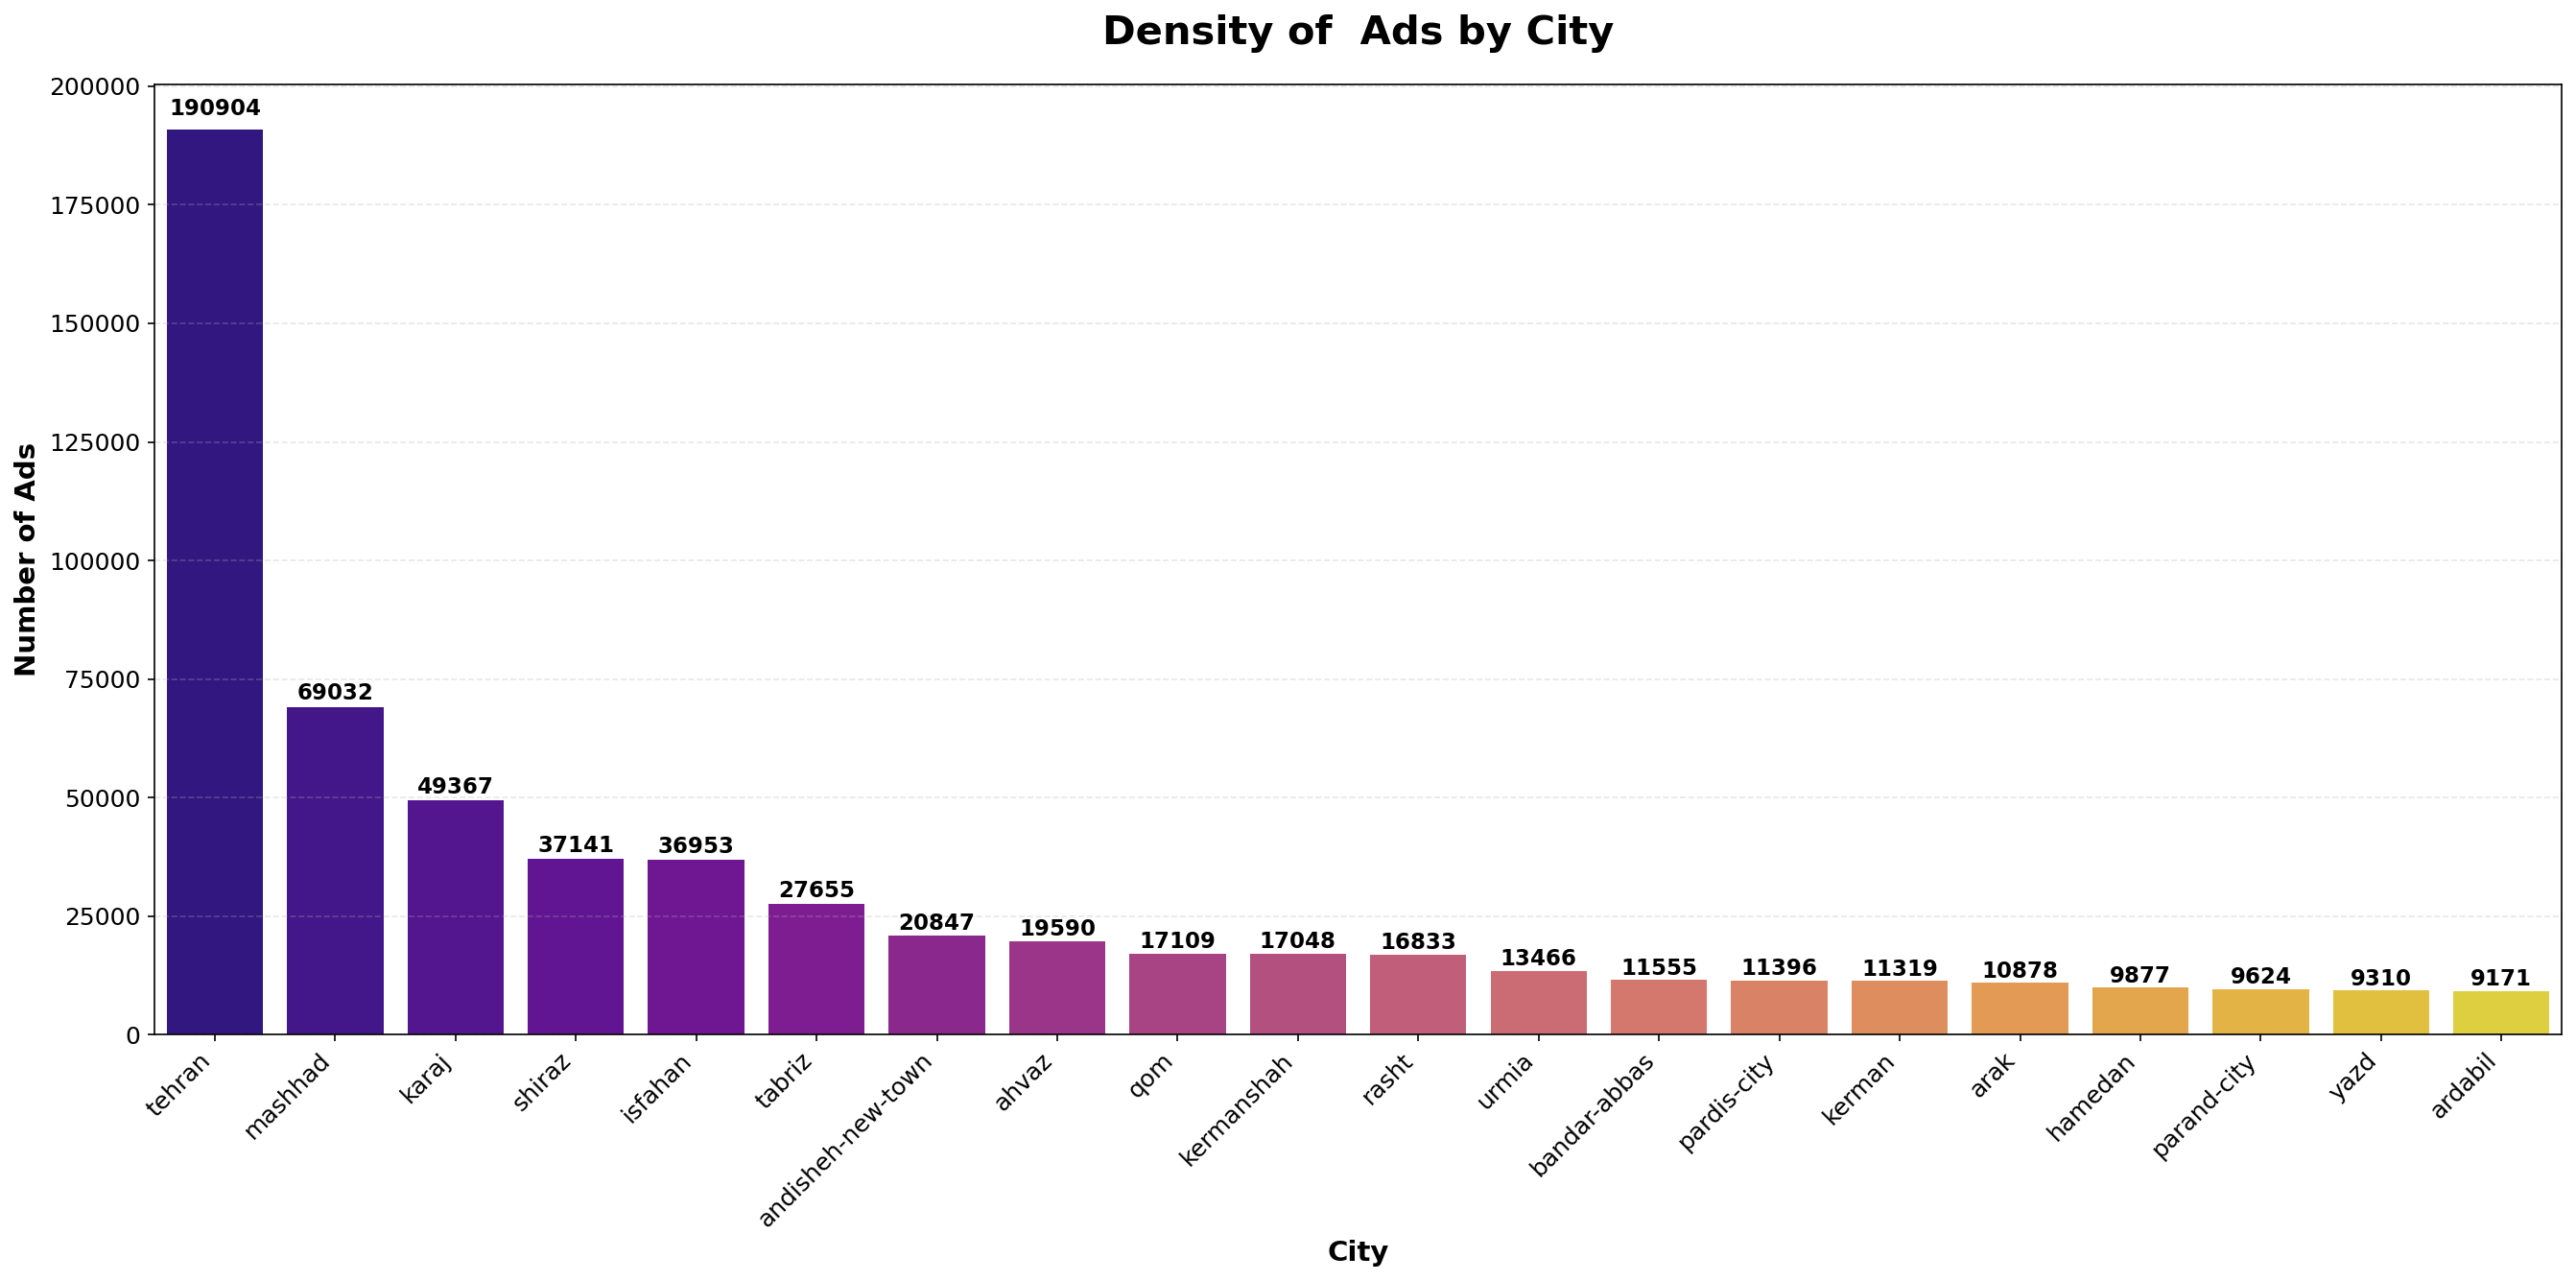

In [187]:
## part 5
plt.figure(figsize=(18, 9), dpi=150)  

# Sort cities by count
city_counts = df['city_slug'].value_counts().head(20)  

sns.barplot(
    x=city_counts.index,
    y=city_counts.values,
    palette="plasma"
)

plt.title("Density of  Ads by City", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("City", fontsize=14, weight="bold")
plt.ylabel("Number of Ads", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", alpha=0.3, linestyle="--")

# Annotate counts on top of bars
for i, val in enumerate(city_counts.values):
    plt.text(i, val + (val * 0.01), str(val), ha="center", va="bottom", fontsize=11, weight="bold")

plt.tight_layout()
plt.show()


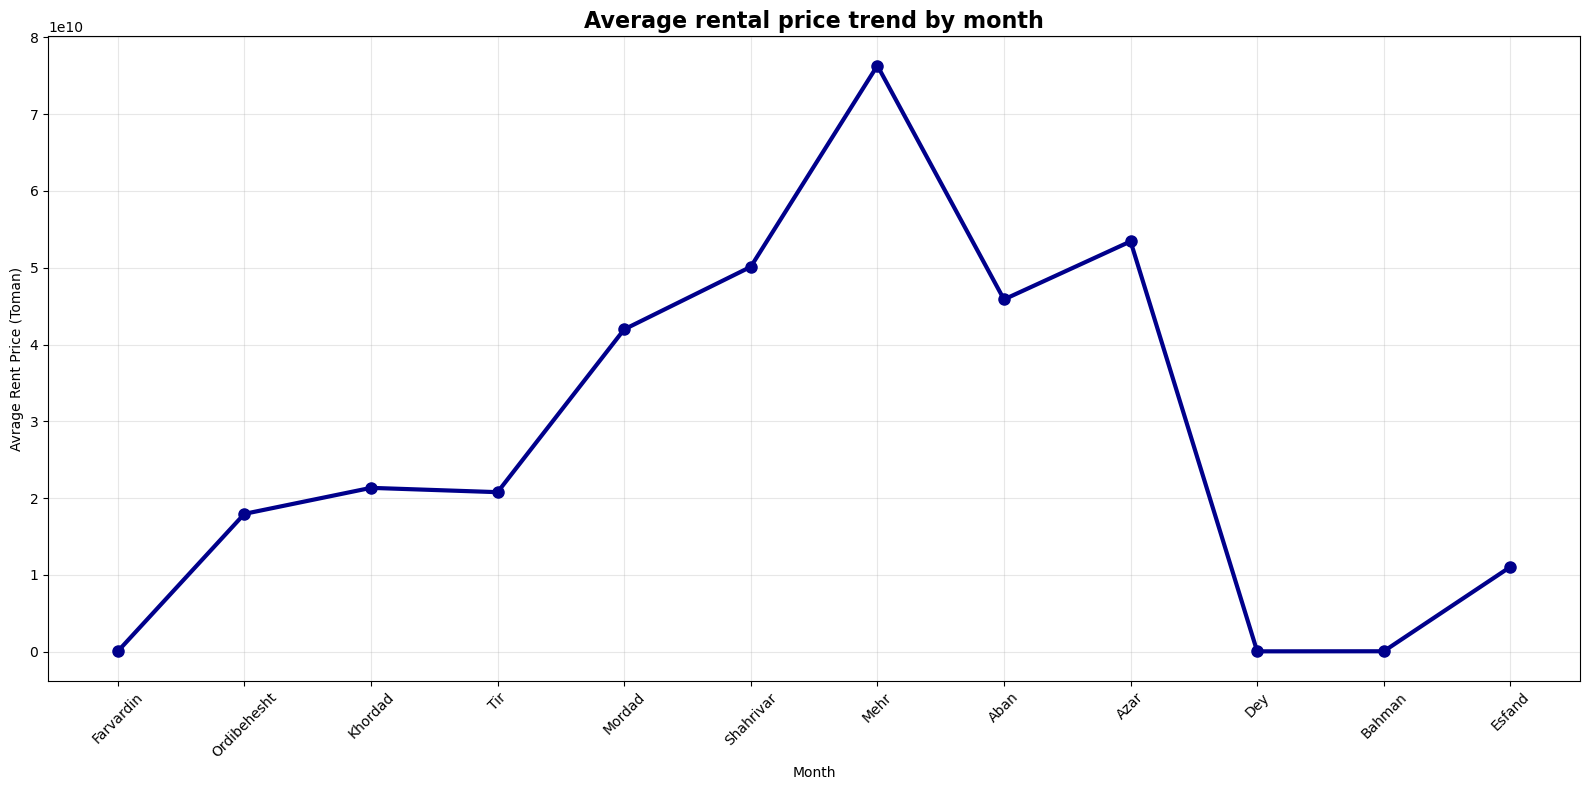

In [188]:
# part 6

rent_data = df[df['cat2_slug'].str.contains('rent')].copy()

if len(rent_data) > 0:

    monthly_rent = rent_data.groupby('shamsi_month')['rent_value'].mean().reset_index()  
    month_order = [
        'Farvardin','Ordibehesht','Khordad','Tir','Mordad','Shahrivar',
        'Mehr','Aban','Azar','Dey','Bahman','Esfand'
    ]
    monthly_rent['shamsi_month'] = pd.Categorical(monthly_rent['shamsi_month'],
                                                  categories=month_order,
                                                  ordered=True)
    monthly_rent = monthly_rent.sort_values('shamsi_month')
    
    
    plt.figure(figsize=(16, 8))
    plt.plot(monthly_rent['shamsi_month'], monthly_rent['rent_value'], 
             marker='o', linewidth=3, markersize=8, color='darkblue')
    plt.title('Average rental price trend by month', fontsize=16, fontweight='bold',)
    plt.xlabel('Month')
    plt.ylabel('Avrage Rent Price (Toman)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    plt.tight_layout()
    plt.show()

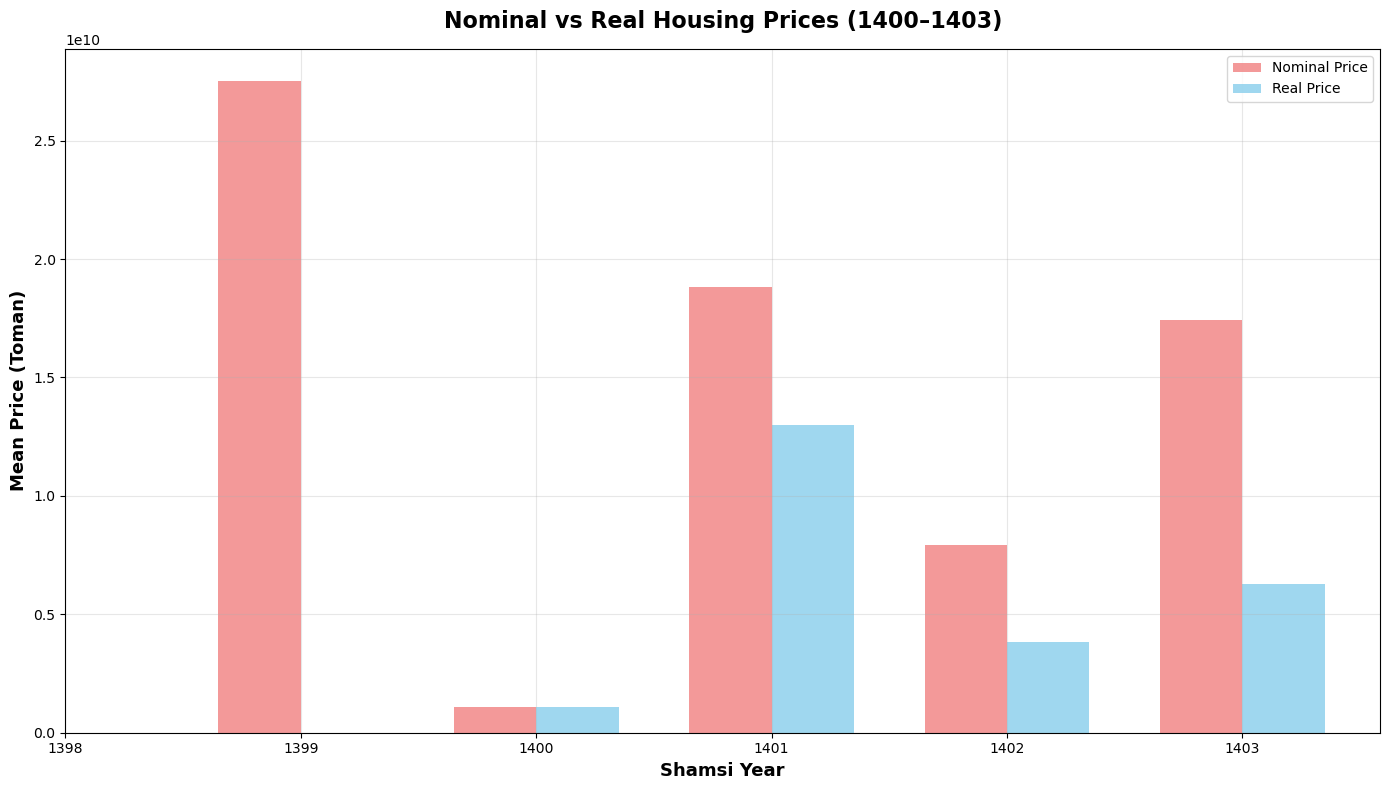

In [189]:

df['created_at_month'] = pd.to_datetime(df['created_at_month'], errors='coerce')


jalali_years, shamsi_months = [], []
shamsi_month_map = {
    1:'Farvardin', 2:'Ordibehesht', 3:'Khordad', 4:'Tir', 5:'Mordad', 6:'Shahrivar',
    7:'Mehr', 8:'Aban', 9:'Azar', 10:'Dey', 11:'Bahman', 12:'Esfand'
}

for date in df['created_at_month']:
    if pd.isna(date):
        jalali_years.append(None)
        shamsi_months.append(None)
    else:
        j_date = JalaliDate(date)
        jalali_years.append(j_date.year)
        shamsi_months.append(shamsi_month_map[j_date.month])

df['shamsi_year'] = jalali_years
df['shamsi_month'] = shamsi_months


inflation_index = {
    1400: 100,
    1401: 145,
    1402: 206,  
    1403: 278  
}


df['real_price'] = None
for year, idx in inflation_index.items():
    mask = df['shamsi_year'] == year
    df.loc[mask, 'real_price'] = df.loc[mask, 'price_value'] * (100 / idx)


yearly_prices = df.groupby('shamsi_year').agg({
    'price_value': 'mean',
    'real_price': 'mean'
}).reset_index()


plt.figure(figsize=(14, 8))
x = range(len(yearly_prices))
width = 0.35

plt.bar([i - width/2 for i in x], yearly_prices['price_value'],
        width, label='Nominal Price', color='lightcoral', alpha=0.8)
plt.bar([i + width/2 for i in x], yearly_prices['real_price'],
        width, label='Real Price ', color='skyblue', alpha=0.8)

plt.xlabel('Shamsi Year', fontsize=13, weight='bold')
plt.ylabel('Mean Price (Toman)', fontsize=13, weight='bold')
plt.title('Nominal vs Real Housing Prices (1400–1403)', fontsize=16, fontweight='bold', pad=15)
plt.xticks(x, yearly_prices['shamsi_year'])
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [190]:
cols = ['price_value', 'land_size', 'building_size', 
                   'regular_person_capacity', 'rooms_count_num', 
                   'location_latitude', 'location_longitude']


for col in cols:
    pct = df[col].isna().mean() * 100
    print(f"{col}: {pct:.2f}% missing")

    

price_value: 43.17% missing
land_size: 81.36% missing
building_size: 1.96% missing
regular_person_capacity: 97.01% missing


KeyError: 'rooms_count_num'

In [ ]:
df[cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   price_value              568346 non-null   float64
 1   land_size                186396 non-null   float64
 2   building_size            980394 non-null   float64
 3   regular_person_capacity  29870 non-null    float64
 4   rooms_count_num          1000000 non-null  float64
 5   location_latitude        655608 non-null   float64
 6   location_longitude       655608 non-null   float64
dtypes: float64(7)
memory usage: 53.4 MB


In [ ]:
df['regular_person_capacity'].unique()

array([ 4., nan,  8.,  5.,  2., 10.,  6., 15.,  3.,  1.,  7., 12., 40.,
       30., 20., 50., 13., 25.,  9., 17., 16., 11., 14., 35., 26., 24.,
       33., 27., 18., 42., 34., 21., 22., 28., 45., 32., 19., 37., 23.,
       29., 38., 36., 44., 49., 31., 43., 46., 48., 39., 47.])

In [ ]:
df['rooms_count'].unique()

array(['سه', 'یک', 'دو', 'بدون اتاق', nan, 'چهار', 'پنج یا بیشتر'],
      dtype=object)

In [ ]:
rooms_map = {
    'بدون اتاق': 0,
    'یک': 1,
    'دو': 2,
    'سه': 3,
    'چهار': 4,
    'پنج یا بیشتر': 5
}

# Step 2: Apply mapping (NaN values remain NaN)
df['rooms_count_num'] = df['rooms_count'].map(rooms_map)

# Step 3: Fill NaN with median to preserve distribution
median_rooms = df['rooms_count_num'].median()
df['rooms_count_num'] = df['rooms_count_num'].fillna(median_rooms)

# Optional: check the result
df[['rooms_count', 'rooms_count_num']].head(10)

,rooms_count,rooms_count_num
0,سه,3.0
1,یک,1.0
2,سه,3.0
3,یک,1.0
4,دو,2.0
5,دو,2.0
6,دو,2.0
7,دو,2.0
8,دو,2.0
9,دو,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   price_value              568346 non-null   float64
 1   land_size                186396 non-null   float64
 2   building_size            980394 non-null   float64
 3   regular_person_capacity  29870 non-null    float64
 4   rooms_count_num          1000000 non-null  float64
 5   location_latitude        655608 non-null   float64
 6   location_longitude       655608 non-null   float64
dtypes: float64(7)
memory usage: 53.4 MB


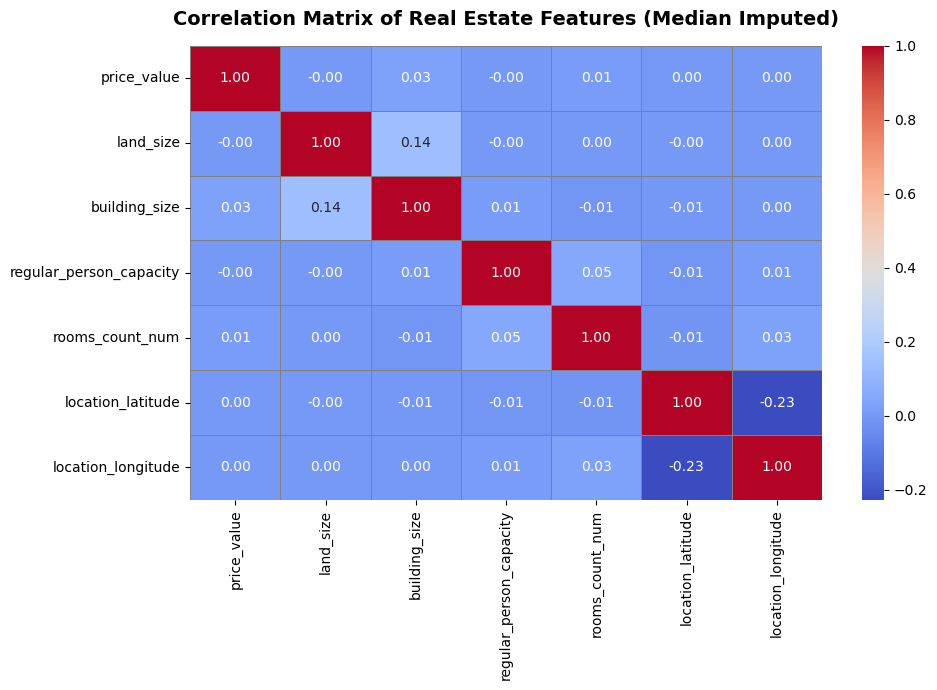

In [ ]:
df[cols].info()



df_corr = df[cols].copy()


# Ensure numeric and replace invalid values with NaN
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the median of each column
df_corr = df_corr.fillna(df_corr.median(numeric_only=True))


#  Drop rows with any NaN values
df_corr = df_corr.dropna(how='any')

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            linewidths=0.5, linecolor='gray', annot_kws={"size":10})
plt.title("Correlation Matrix of Real Estate Features", 
          fontsize=14, fontweight="bold", pad=15)
plt.tight_layout()
plt.show()

In [191]:
luxury_features = ['has_balcony', 'has_elevator', 'has_security_guard', 'has_barbecue', 'has_pool']


# df['has_pool'] = df['has_pool'].map({False: 0, True: 1})
# # for col in luxury_features:
# #     pct = df[luxury_features].isna().mean() * 100
# #     print(f"{luxury_features}: {pct:.2f}% missing")
# df['has_pool'].value_counts()

In [192]:
for col in luxury_features:
    df[col] = df[col].map({False: 0, True: 1})

In [200]:
df[luxury_features] = df[luxury_features].fillna(0)

In [202]:
df['has_elevator'].unique()

array([0., 1.])

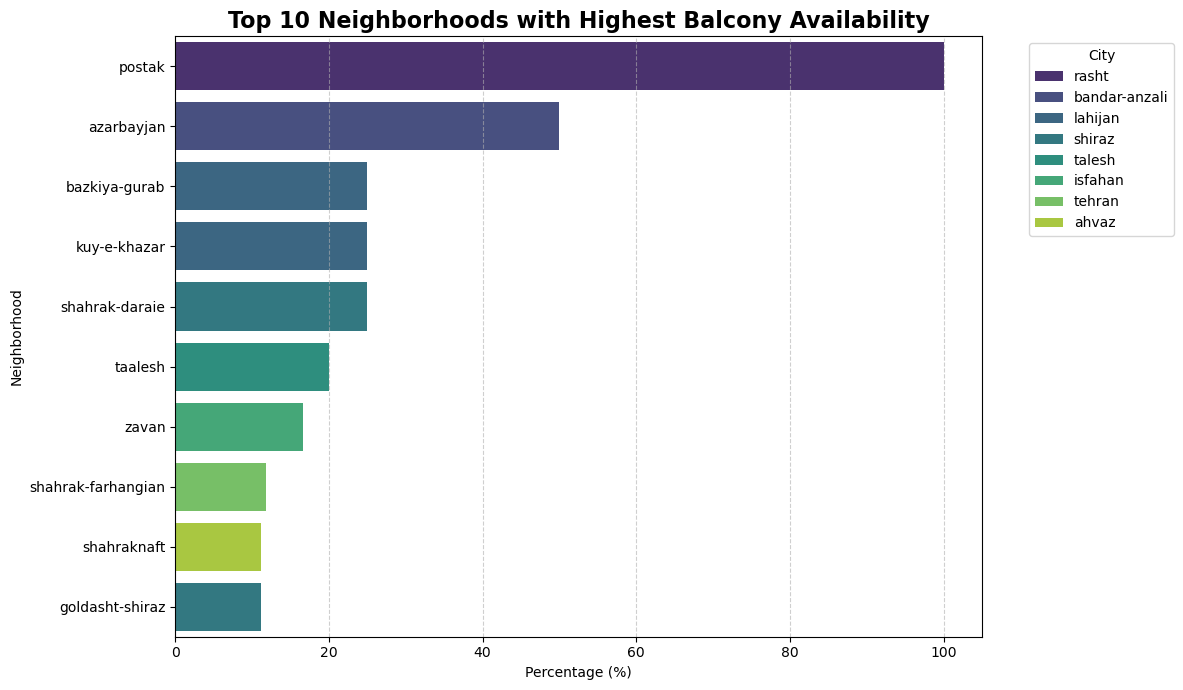

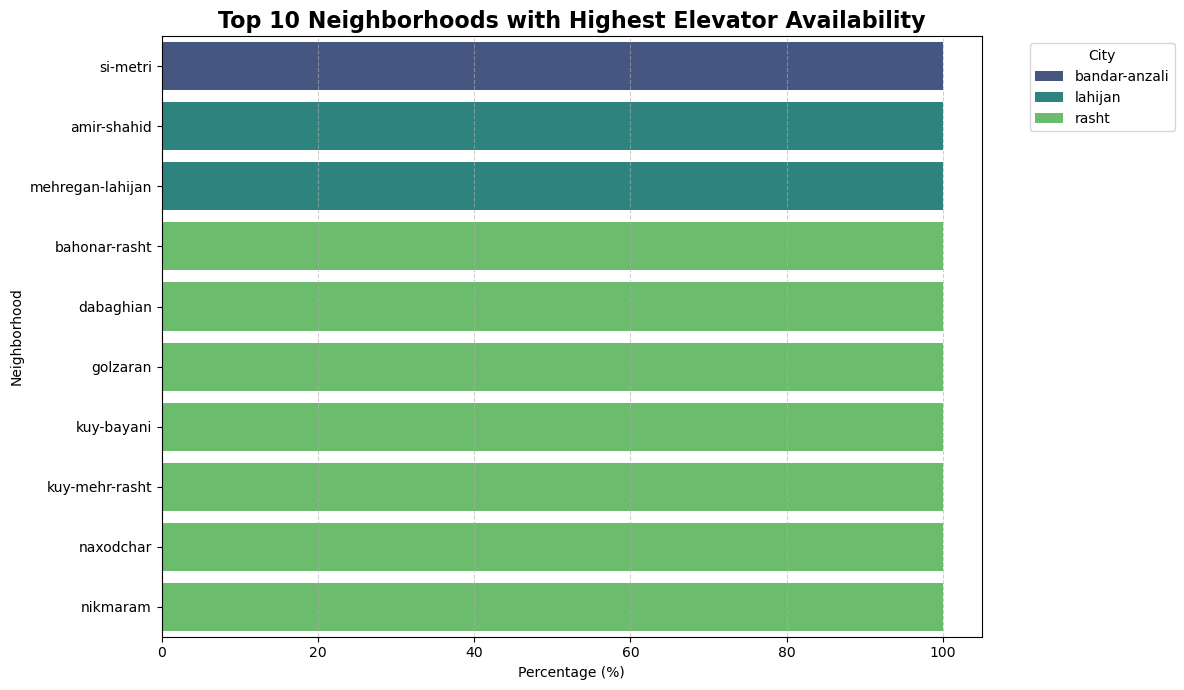

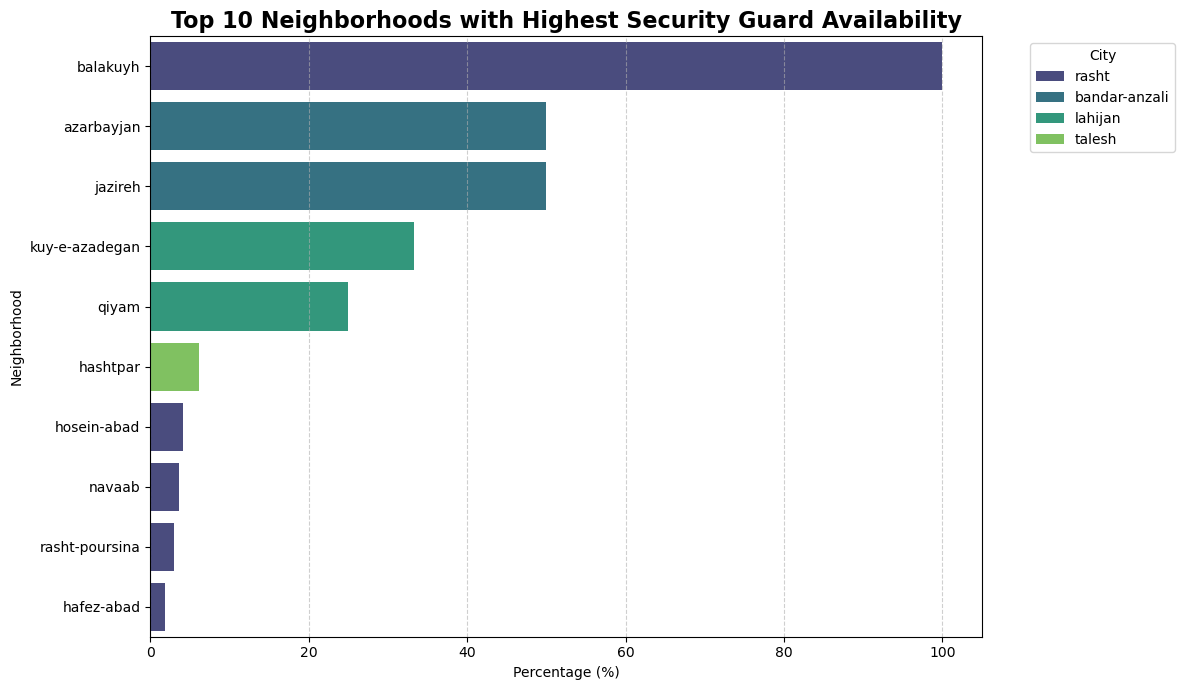

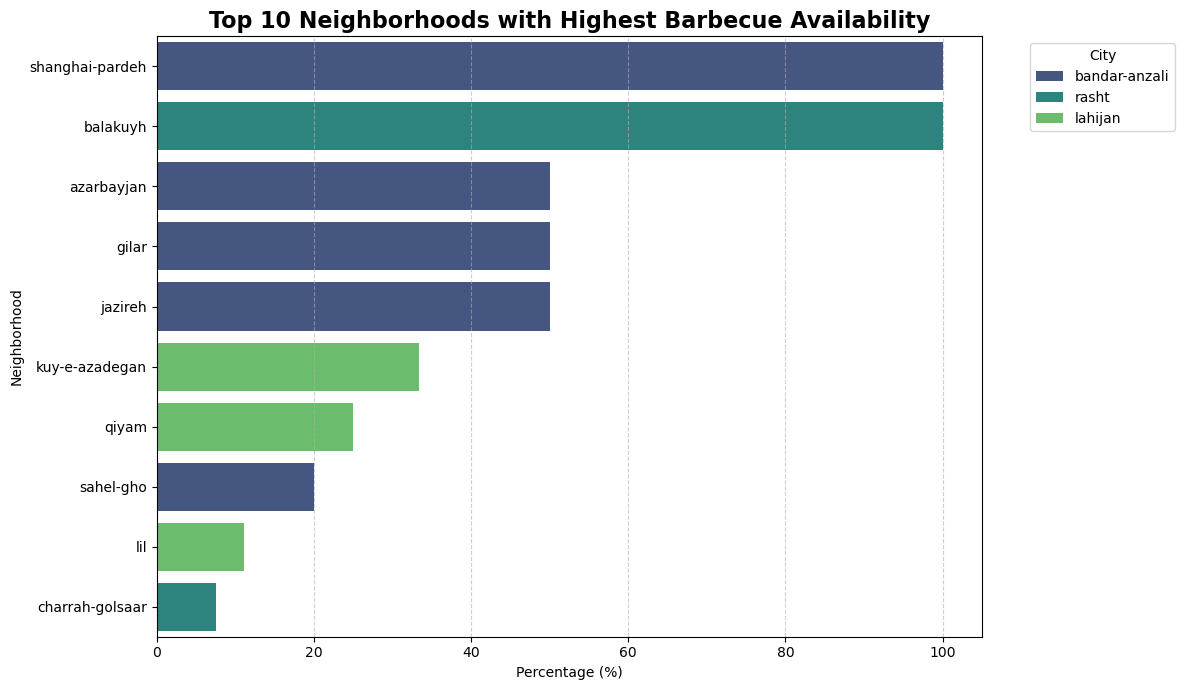

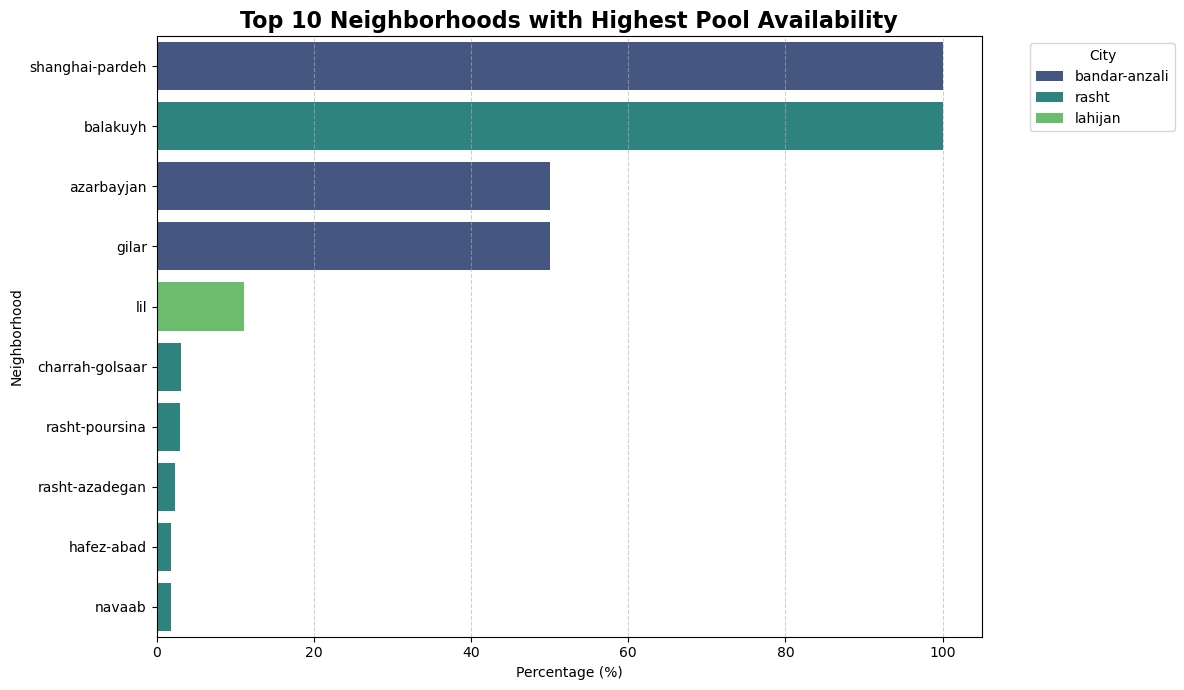

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

luxury_features = {
    'has_balcony': 'Balcony',
    'has_elevator': 'Elevator',
    'has_security_guard': 'Security Guard',
    'has_barbecue': 'Barbecue',
    'has_pool': 'Pool'
}

for feature, label in luxury_features.items():
    # درصد محله‌ها برای ویژگی
    feature_by_neigh = df.groupby(['city_slug', 'neighborhood_slug'])[feature].mean() * 100
    feature_by_neigh = feature_by_neigh.reset_index()
    
    # انتخاب ۱۰ محله‌ی برتر
    top_neigh = feature_by_neigh.nlargest(10, feature)
    
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=top_neigh, 
        x=feature, y="neighborhood_slug", 
        hue="city_slug", dodge=False,
        palette="viridis"
    )
    
    plt.title(f"Top 10 Neighborhoods with Highest {label} Availability", fontsize=16, weight='bold')
    plt.xlabel("Percentage (%)")
    plt.ylabel("Neighborhood")
    plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


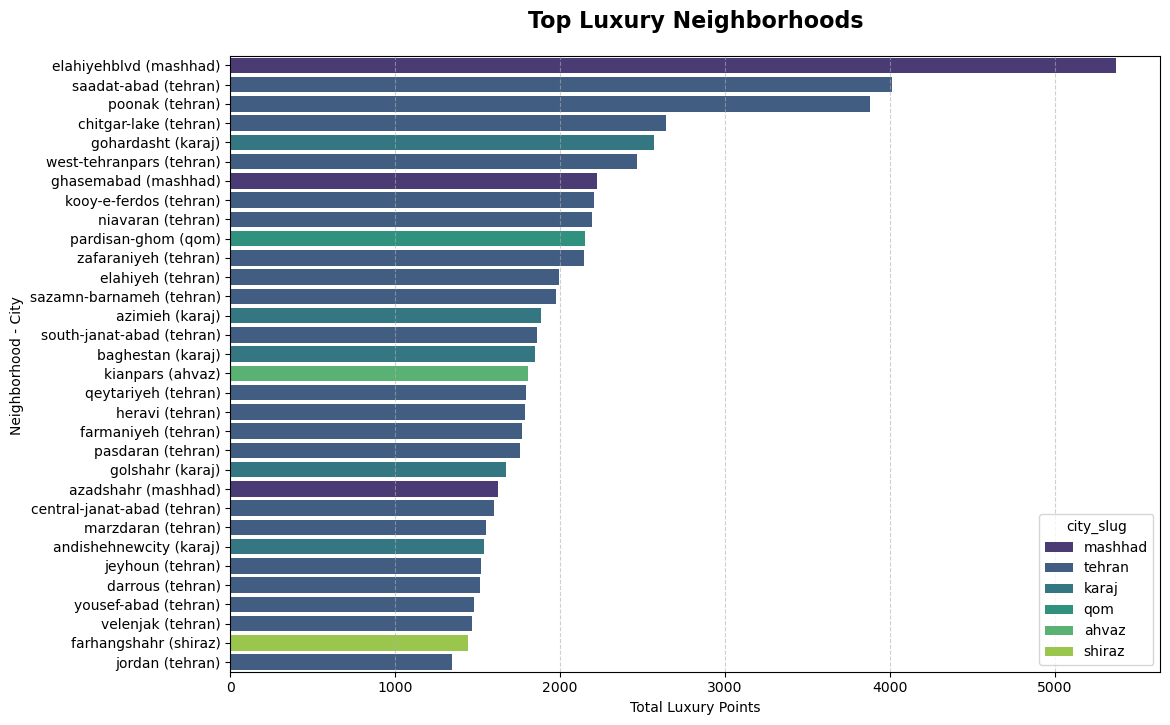

In [ ]:


# Your luxury features
luxury_features = ['has_balcony', 'has_elevator', 'has_security_guard', 
                   'has_barbecue', 'has_pool']

# Make sure NaN → 0
df[luxury_features] = df[luxury_features].fillna(0).astype(int)

# Sum all luxury features into one "luxury score" per property
df["luxury_score"] = df[luxury_features].sum(axis=1)

# Group by neighborhood (and city), sum the scores
luxury_by_neigh = (
    df.groupby(["city_slug", "neighborhood_slug"])["luxury_score"]
    .sum()
    .reset_index()
    .sort_values("luxury_score", ascending=False)
)


luxury_by_neigh["neigh_city"] = (
    luxury_by_neigh["neighborhood_slug"] + " (" + luxury_by_neigh["city_slug"] + ")"
)

# Show top 15 neighborhoods with highest luxury points
top_neigh = luxury_by_neigh.head(32)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_neigh,
    x="luxury_score",
    y="neigh_city",
    hue="city_slug",
    dodge=False,
    palette="viridis"
)
plt.title("Top Luxury Neighborhoods", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Total Luxury Points")
plt.ylabel("Neighborhood - City ")

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
